<a href="https://colab.research.google.com/github/ibudeX/Heart-Disease-Prediction/blob/main/Heart_Disease_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kingabzpro/heart-disease-patients")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-patients


In [ ]:
import os
os.listdir(path)

['heart_disease_patients.csv', '.nfs000000001be77c2800000090']

In [ ]:
data=pd.read_csv(path+'/heart_disease_patients.csv')

In [ ]:
data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [ ]:
#set id column to index
data.set_index('id',inplace=True)

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
id,,,,,,,,,,,
1,63,1,1,145,233,1,2,150,0,2.3,3
2,67,1,4,160,286,0,2,108,1,1.5,2
3,67,1,4,120,229,0,2,129,1,2.6,2
4,37,1,3,130,250,0,0,187,0,3.5,3
5,41,0,2,130,204,0,2,172,0,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2
300,68,1,4,144,193,1,0,141,0,3.4,2
301,57,1,4,130,131,0,0,115,1,1.2,2


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

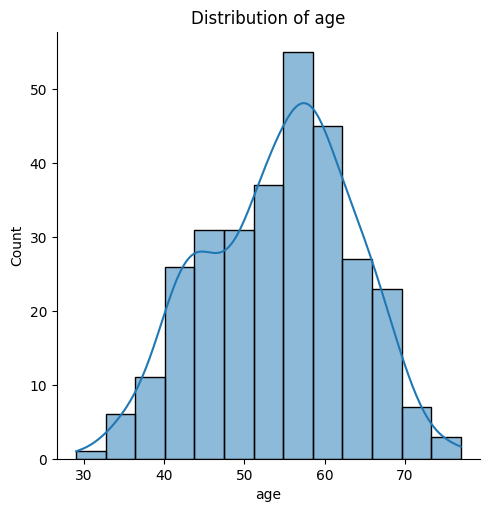

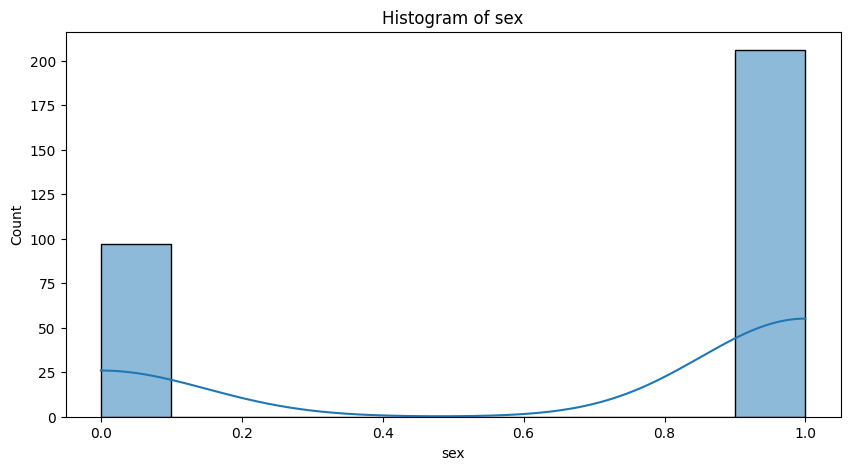

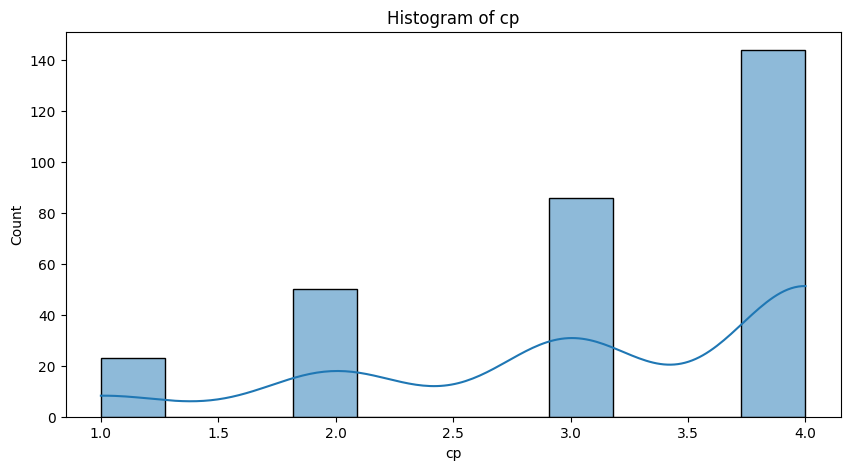

<Figure size 1000x500 with 0 Axes>

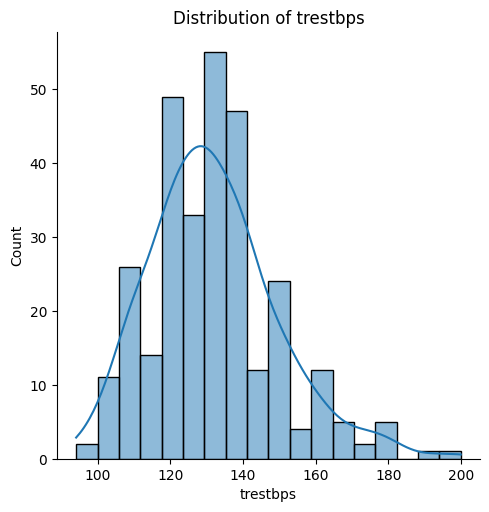

<Figure size 1000x500 with 0 Axes>

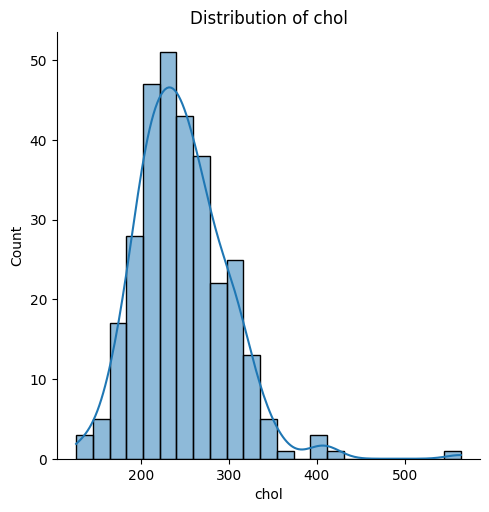

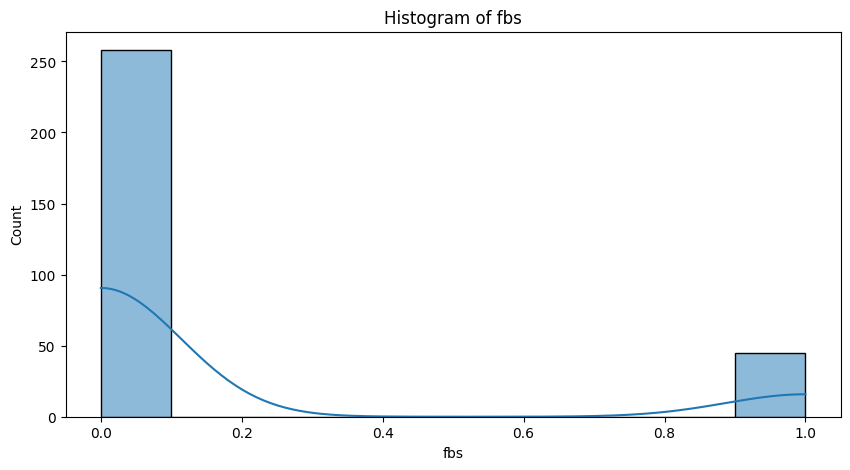

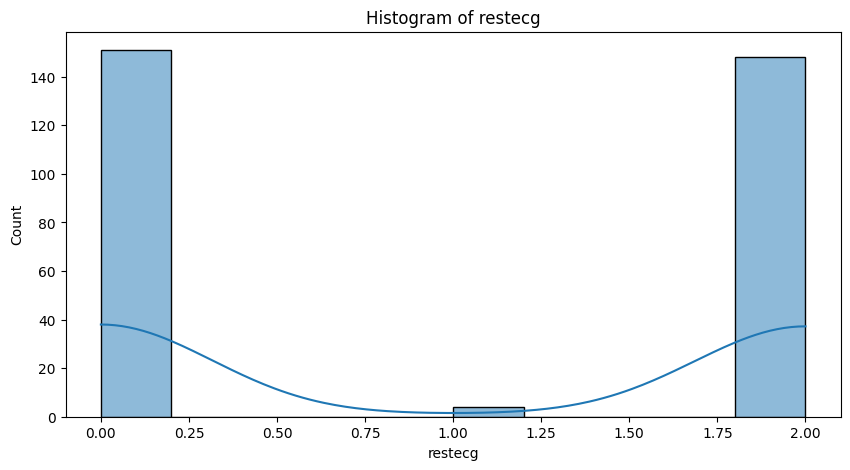

<Figure size 1000x500 with 0 Axes>

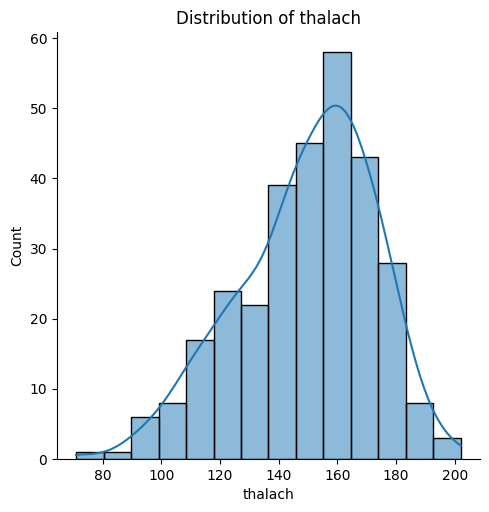

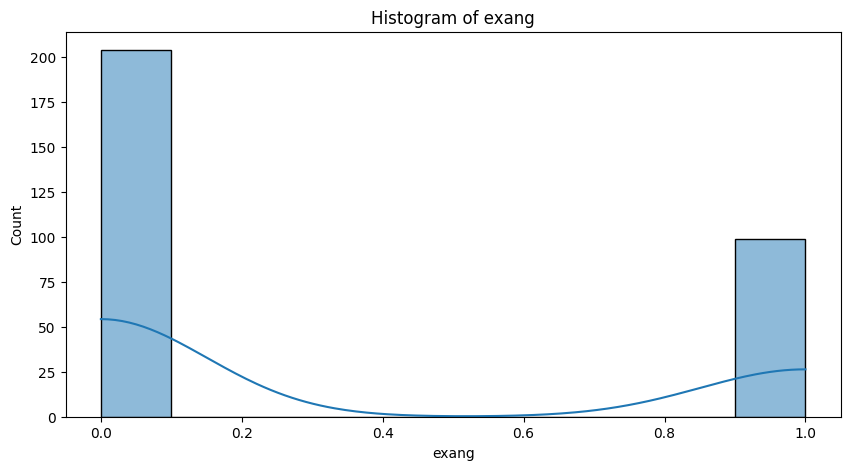

<Figure size 1000x500 with 0 Axes>

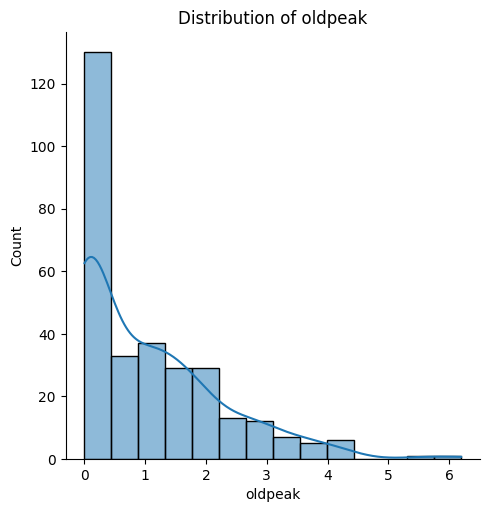

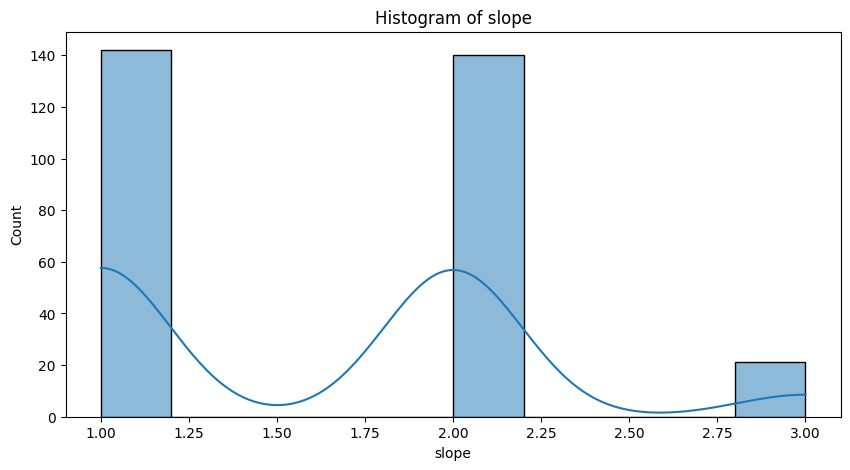

In [ ]:

# Change cols to be a list of column names directly
cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']

# Loop through each column name and create a distribution plot
for i in cols:
  # Check the number of unique values in the column
  if data[i].nunique() >=5: # Use displot for columns with 10 or more unique values (likely continuous)
    plt.figure(figsize=(10,5))
    # Pass the single column name (i) to the 'x' argument
    sns.displot(x=i,data=data,kde=True)
    x_label=i
    plt.title(f'Distribution of {i}')

  else: # Use histplot for columns with less than 10 unique values (likely discrete or categorical)
    plt.figure(figsize=(10,5))
    # Pass the single column name (i) to the 'x' argument
    sns.plot(x=i,data=data,kde=True)
    x_label=i
    plt.title(f'Histogram of {i}')

<Axes: >

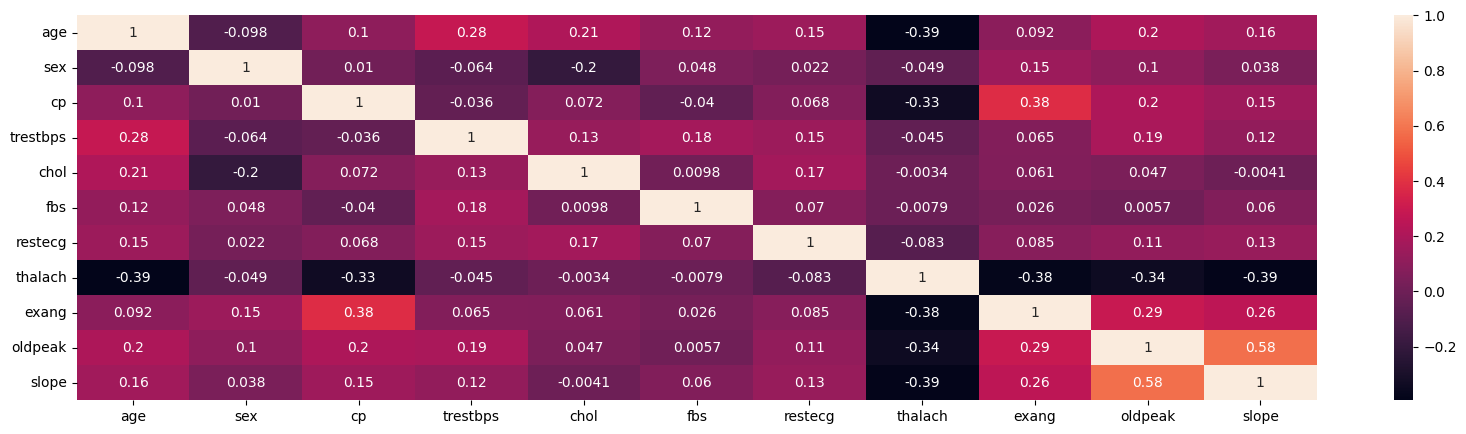

In [ ]:
#plot heatmap of corr of data
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(),annot=True)

